# Permafrost Coverage

- https://nsidc.org/data/user-resources/get-started-nsidc-data
- https://nsidc.org/data/ggd318/versions/2
- https://nsidc.org/sites/default/files/ggd318-v002-userguide.pdf

- https://nsidc.org/sites/default/files/heginbottometal_1993.pdf

### Downloading the Data from the National Snow and Ice Data Center (NSIDC) using FTP (File Transfer Protocol)

In [1]:
from ftplib import FTP

def download_from_ftp(ftp_server, ftp_directory, local_directory=".", username="anonymous", password=""):
    """
    Download Shapefiles and associated files from an FTP server to a local directory.
    
    Parameters:
    ftp_server (str): Address of the FTP server.
    ftp_directory (str): Directory on the FTP server to navigate to.
    local_directory (str): Local directory to download files to. Defaults to current directory.
    username (str): Username for FTP login. Defaults to 'anonymous'.
    password (str): Password for FTP login. Often an email for anonymous login.
    """
    
    # List of file extensions associated with shapefiles
    extensions = ['.shp', '.shx', '.dbf', '.prj', '.sbn', '.sbx', '.fbn', '.fbx', '.ain', '.aih', '.atx', '.ixs', '.mxs', '.xml', '.cpg', '.qix']
    
    with FTP(ftp_server) as ftp:
        ftp.login(username, password)  # Login to the FTP server
        ftp.cwd(ftp_directory)         # Change to the specified directory
        files = ftp.nlst()             # List all files in the directory

        # Loop through each file in the directory
        for file in files:
            # Check if file has an extension that is part of the shapefile
            for ext in extensions:
                if file.endswith(ext):
                    local_path = f"{local_directory}/{file}"
                    # Open the file in binary write mode
                    with open(local_path, "wb") as local_file:
                        # Retrieve binary file from FTP and write to local file
                        ftp.retrbinary(f"RETR {file}", local_file.write)
                    print(f"Downloaded {file} to {local_path}")

# Configuration for FTP download
ftp_server = "sidads.colorado.edu"
ftp_directory = "/pub/DATASETS/fgdc/ggd318_map_circumarctic/"  
local_directory = r"C:\xxx\xxx\Siberixxxa_Data"  
username = "anonymous"  
password = "xxxxx@gmail.com"  # Replace with your email address

# Uncomment the line below to execute the download function
# download_from_ftp(ftp_server, ftp_directory, local_directory, username, password)

In [2]:
# File and Data Manipulation
import os                       # interacting with the operating system
import glob                     # retrieving files/pathnames matching a specified pattern
from collections import Counter # counting hashable objects
import shutil                   # high-level file operations
import pickle                   # serializing and de-serializing Python object structures

# Data Analysis
import numpy as np              # numerical operations
import pandas as pd             # data manipulation and analysis

# Geospatial Data Handling
import geopandas as gpd         # working with geospatial data

# Data Visualization
import matplotlib.pyplot as plt       # creating static, interactive, and animated visualizations
plt.style.use("default")              # Set the default style matplotlib plots
import matplotlib.colors as mcolors   # colors for legend
import matplotlib.patches as mpatches # drawing patches (shapes) for legend
from matplotlib.patches import Rectangle # drawing patches (shapes) for legend

# Suppress Warnings
import warnings                   # handling warnings
warnings.filterwarnings("ignore") # Suppress all warnings

In [3]:
# Define Working Directory
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Maps_Siberia_Data')
# Yenisey Watershed (Shapefile)
AGRO_Watershed = gpd.read_file('ArcticGRO_Yenisei_watershed')
# Lakes (Shapefile)
gpd_lakes = gpd.read_file('GeoPandas_Yenisei_lakes')

In [4]:
# Permafrost
file_path = 'J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data\PERMAFROST_'
permafrost = gpd.read_file(file_path)
print(permafrost.crs)
print()
print(permafrost.dtypes)
print()
permafrost.head(1)

PROJCS["Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Area",GEOGCS["GCS_Sphere_ARC_INFO",DATUM["D_Sphere_ARC_INFO",SPHEROID["Sphere_ARC_INFO",6370997,0]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",90],PARAMETER["longitude_of_center",180],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

NUM_CODE      object
COMBO         object
RELICT        object
EXTENT        object
CONTENT       object
LANDFORM      object
geometry    geometry
dtype: object



,NUM_CODE,COMBO,RELICT,EXTENT,CONTENT,LANDFORM,geometry
0,25,ld,None,None,None,None,"POLYGON ((581712.750 6820943.500, 586466.250 6..."


In [5]:
permafrost.crs

<Projected CRS: PROJCS["Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Ar ...>
Name: Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Area
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area (Spherical)
Datum: D_Sphere_ARC_INFO
- Ellipsoid: Sphere_ARC_INFO
- Prime Meridian: Greenwich

(-6846268.500062591, 6846266.000095001)

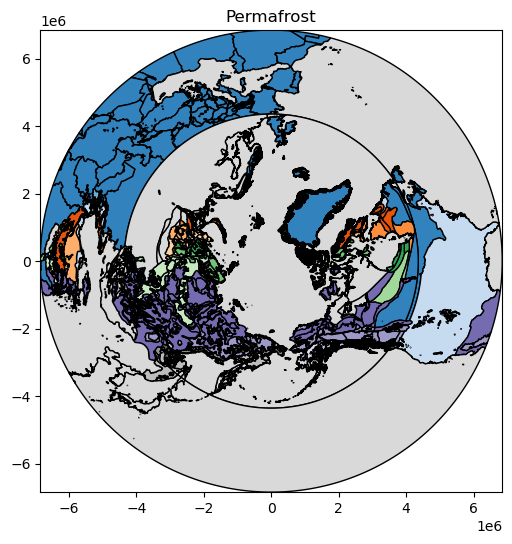

In [6]:
# Quick Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Permafrost', fontsize=12)
permafrost.plot(ax=ax, cmap='tab20c', edgecolor='black', lw=1)
# Setting the plot limits to the extent of the eco data
xmin, ymin, xmax, ymax = permafrost.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

In [7]:
# Reproject Watershed Shapefile to match the Permafrost CRS
AGRO_Watershed_reprojected = AGRO_Watershed.to_crs(permafrost.crs)

# Clip the permafrost data to the extent of the reprojected Yenisei River Watershed
clipped_permafrost = gpd.clip(permafrost, AGRO_Watershed_reprojected)

# Show CRS
print(clipped_permafrost.crs)

PROJCS["Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Area",GEOGCS["GCS_Sphere_ARC_INFO",DATUM["D_Sphere_ARC_INFO",SPHEROID["Sphere_ARC_INFO",6370997,0]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",90],PARAMETER["longitude_of_center",180],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


(-1614418.1744807945, 317143.03963221406)

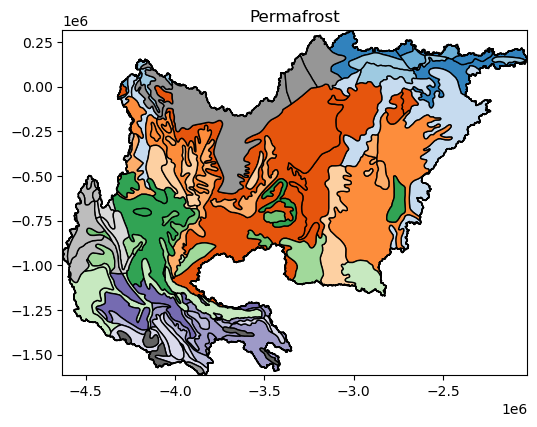

In [8]:
# Quick Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Permafrost', fontsize=12)
AGRO_Watershed_reprojected.plot(ax=ax, color='none', edgecolor='black', lw=1, zorder=2)
clipped_permafrost.plot(ax=ax, cmap='tab20c', edgecolor='black', lw=1)
# Setting the plot limits to the extent of the eco data
xmin, ymin, xmax, ymax = clipped_permafrost.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

### Attributes

In [9]:
clipped_permafrost.columns

Index(['NUM_CODE', 'COMBO', 'RELICT', 'EXTENT', 'CONTENT', 'LANDFORM',
       'geometry'],
      dtype='object')

<br><br>

### Extent 
(S) - Sporadic
(D) - Discontinuous
(C) - Continous
(D) - Isolated

<br><br>

In [10]:
# Extract the unique values from the "ExTENT" column
unique_extents = clipped_permafrost['EXTENT'].unique()
# Filter out the 'None' entry from unique_extents
unique_extents = [e for e in unique_extents if e is not None]
unique_extents

['S', 'D', 'C', 'I']

In [11]:
# Creating individual GeoDataFrames for each extent
Continuous = clipped_permafrost[clipped_permafrost['EXTENT'] == 'C']
Discontinuous = clipped_permafrost[clipped_permafrost['EXTENT'] == 'D']
Sporadic = clipped_permafrost[clipped_permafrost['EXTENT'] == 'S']
Isolated = clipped_permafrost[clipped_permafrost['EXTENT'] == 'I']

In [12]:
# Total Watershed Area
AGRO_Watershed_reprojected_total_area_shapefile_km2 = AGRO_Watershed_reprojected.geometry.area.sum() / 1e6
print(f"Total Area = {AGRO_Watershed_reprojected_total_area_shapefile_km2:.0f} km2")

# Calculate the area for each type
area_continuous_m2 = Continuous.geometry.area.sum()
area_discontinuous_m2 = Discontinuous.geometry.area.sum()
area_sporadic_m2 = Sporadic.geometry.area.sum()
area_isolated_m2 = Isolated.geometry.area.sum()

# Calculate the area (km2)
area_continuous_km2 = area_continuous_m2 * 1e-6
area_discontinuous_km2 = area_discontinuous_m2 * 1e-6
area_sporadic_km2 = area_sporadic_m2 * 1e-6
area_isolated_km2 = area_isolated_m2 * 1e-6

# Calculate the total area
total_area_m2 = area_continuous_m2 + area_discontinuous_m2 + area_sporadic_m2 + area_isolated_m2
total_area_km2 = total_area_m2 * 1e-6

print(f"Permafrost Area = {total_area_km2:.0f} km2")
print()

# Calculate Percent Covergae
xxx = (total_area_km2/AGRO_Watershed_reprojected_total_area_shapefile_km2)*100
print(f"Total Permafrost Coverage = {xxx:.3f} %")
print()

# Calculate the relative percentages for each type
percent_continuous = (area_continuous_m2 / total_area_m2) * 100
percent_discontinuous = (area_discontinuous_m2 / total_area_m2) * 100
percent_sporadic = (area_sporadic_m2 / total_area_m2) * 100
percent_isolated = (area_isolated_m2 / total_area_m2) * 100

percent_continuous, percent_discontinuous, percent_sporadic, percent_isolated

print(f"Relative Permafrost Coverage:")
print(f"{percent_continuous:.0f}% Continuous")
print(f"{percent_discontinuous:.0f}% Discontinuous")
print(f"{percent_sporadic:.0f}% Sporadic")
print(f"{percent_isolated:.0f}% Isolated")
print()
print(f"Area:")
print(f"{area_continuous_km2:.0f} km2 Continuous")
print(f"{area_discontinuous_km2:.0f} km2 Discontinuous")
print(f"{area_sporadic_km2:.0f} km2 Sporadic")
print(f"{area_isolated_km2:.0f} km2 Isolated")

Total Area = 2564574 km2
Permafrost Area = 2293886 km2

Total Permafrost Coverage = 89.445 %

Relative Permafrost Coverage:
37% Continuous
13% Discontinuous
22% Sporadic
28% Isolated

Area:
853787 km2 Continuous
291496 km2 Discontinuous
494982 km2 Sporadic
653621 km2 Isolated


In [13]:
df = pd.DataFrame()
df['permafrost_type'] = ['Continuous', 'Discontinuous', 'Sporadic', 'Isolated']
df['area_km2'] = [area_continuous_km2, area_discontinuous_km2, area_sporadic_km2, area_isolated_km2]
df['percent_area'] = (df['area_km2']/AGRO_Watershed_reprojected_total_area_shapefile_km2)*100
df['rel_percent_area'] = [percent_continuous, percent_discontinuous, percent_sporadic, percent_isolated]
df['colors'] = ['darkviolet', 'mediumorchid', 'violet', 'thistle']
df

,permafrost_type,area_km2,percent_area,rel_percent_area,colors
0,Continuous,853787.355462,33.291586,37.220132,darkviolet
1,Discontinuous,291495.665804,11.366241,12.707505,mediumorchid
2,Sporadic,494981.726209,19.300739,21.578306,violet
3,Isolated,653621.140638,25.486539,28.494056,thistle


In [14]:
print(df['percent_area'].sum())
print(df['rel_percent_area'].sum())

89.44510428251938
100.0


#### Note:
- Permafrost covers 89% of the total watershed area. 
- Continous Permafrost has the largest contribution.

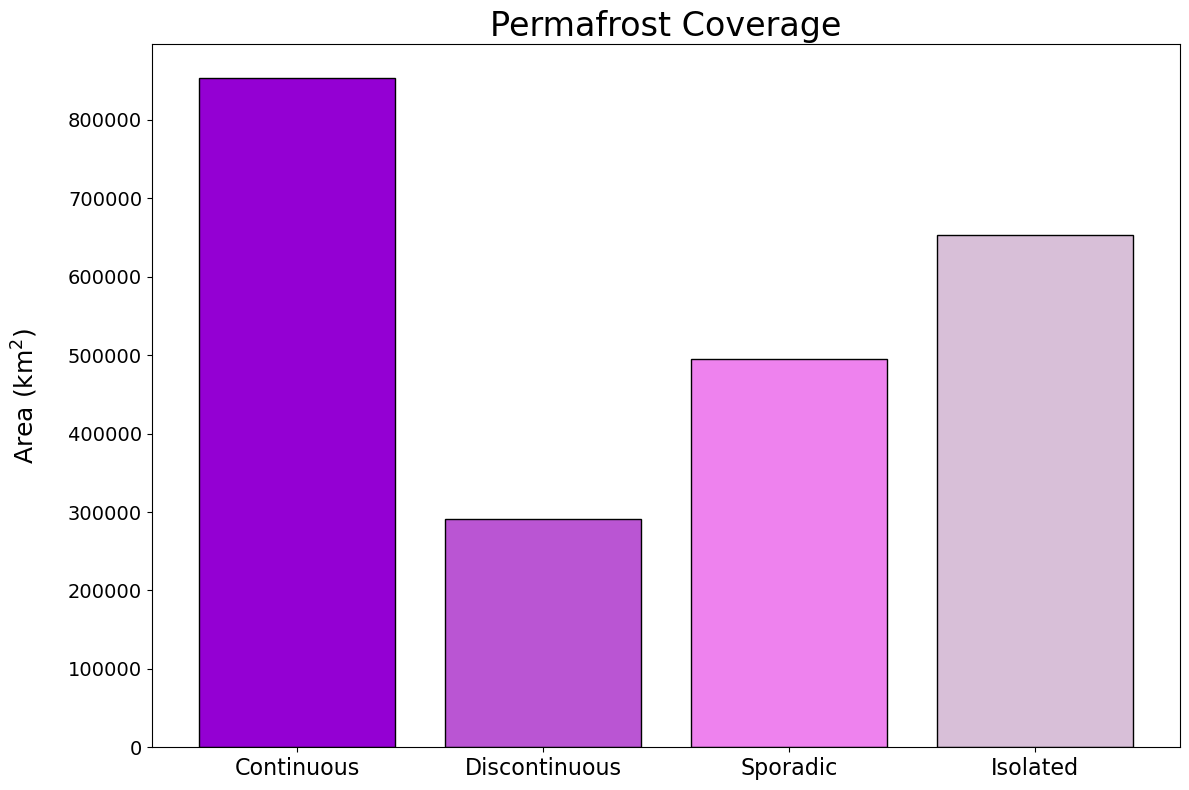

In [15]:
# Setting up the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(df['permafrost_type'], df['area_km2'], color=df['colors'], edgecolor='black')
    
# Setting plot title and labels
ax.set_title('Permafrost Coverage', fontsize=24)
#ax.set_xlabel('Ecoregions', fontsize=18)
ax.set_ylabel('Area (km$^2$)', fontsize=18, labelpad=20)
#ax.set_xticks([])  # Hide x-axis ticks for clarity
#ax.set_ylim(0,70)
# Rotate x labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.yticks(fontsize=14)

# Displaying the bar plot
fig.tight_layout()

#fig.savefig('xxx.png', dpi = 600, bbox_inches='tight')

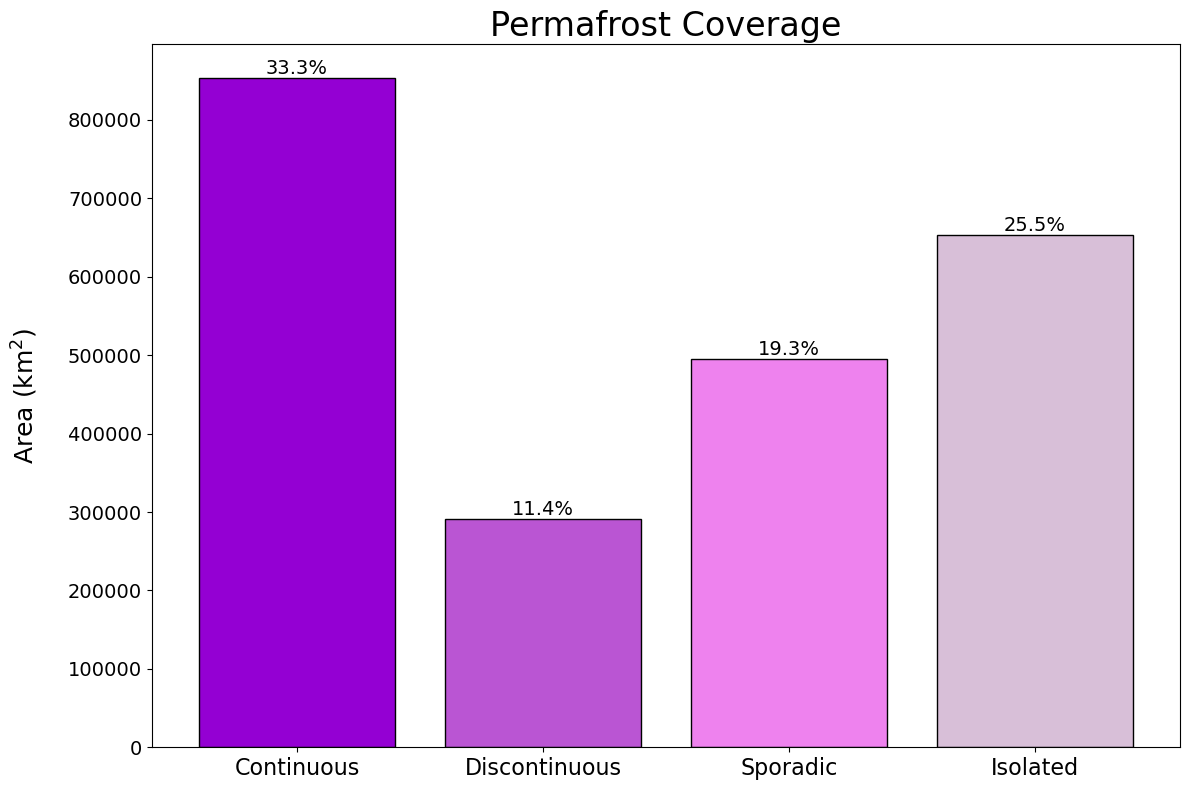

In [16]:
# Setting up the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(df['permafrost_type'], df['area_km2'], color=df['colors'], edgecolor='black')

# Displaying the value above each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    # Using the 'percent_area' value from the DataFrame
    percent_area = df['percent_area'].iloc[idx]
    ax.text(bar.get_x() + bar.get_width() / 2., height + 0.3,
            '{:.1f}%'.format(percent_area),
            ha='center', va='bottom', fontsize=14)
    
# Setting plot title and labels
ax.set_title('Permafrost Coverage', fontsize=24)
ax.set_ylabel('Area (km$^2$)', fontsize=18, labelpad=20)
plt.xticks(rotation=0, ha='center', fontsize=16)
plt.yticks(fontsize=14)

# Displaying the bar plot
fig.tight_layout()


#fig.savefig('xxx.png', dpi = 600, bbox_inches='tight')

### Notes

The above plot shows the area of each permafrost type with the percent coverage displayed. 

<br><br>

### COMBO <br>

##### Letter 1.

The first letter is related to the **Permafrost Extent** code. 
- (S) Sporadic, (D) Discontinuous, (C) Continous, (D) Isolated 
<br><br>


##### Letter 2. 

The second letter is related to **Ground Ice Content** code. 
- (h) High, (m) Medium, and (l) Low ice respectively. 
<br><br>

##### Letter 3.

The third letter, represents **Landform**, or the terrain and overburden. 
- (f) lowlands, highlands, and intra- and intermontane depressions characterized by thick overburden cover.
- (r) mountains, highlands ridges, and plateaus characterized by thin overburden cover (>5-10m) and exposed bedrock.

<br>

##### Example (cmf)

**Continuous Permafrost** with **Medium Ground Ice** in a **lowlands, highlands, and intra- and intermontane depressions characterized by thick overburden cover**.

In [17]:
# Extract the unique values from the "ExTENT" column
unique_extents = clipped_permafrost['COMBO'].unique()
# Filter out the 'None' entry from unique_extents
unique_extents = [e for e in unique_extents if e is not None]
unique_extents

['Slf',
 'Dlf',
 'Shf',
 'Dmf',
 'Clf',
 'Chf',
 'Dlr',
 'Dhf',
 'Clr',
 'Ilr',
 'Ilf',
 'Slr',
 'Chr',
 'ld',
 'Shr',
 'Smf',
 'Dhr',
 'Cmf',
 'Ihr',
 'l',
 'Imf',
 'Ihf',
 'r']

<br><br>

### Plot Ground Ice Contents

<br><br>

In [18]:
# Plotting in WGS84 (EPSG:4326)
clipped_permafrost_4326 = clipped_permafrost.to_crs(4326)

# Creating individual GeoDataFrames for each extent
Continuous_4326 = clipped_permafrost_4326[clipped_permafrost_4326['EXTENT'] == 'C']
Discontinuous_4326 = clipped_permafrost_4326[clipped_permafrost_4326['EXTENT'] == 'D']
Sporadic_4326 = clipped_permafrost_4326[clipped_permafrost_4326['EXTENT'] == 'S']
Isolated_4326 = clipped_permafrost_4326[clipped_permafrost_4326['EXTENT'] == 'I']

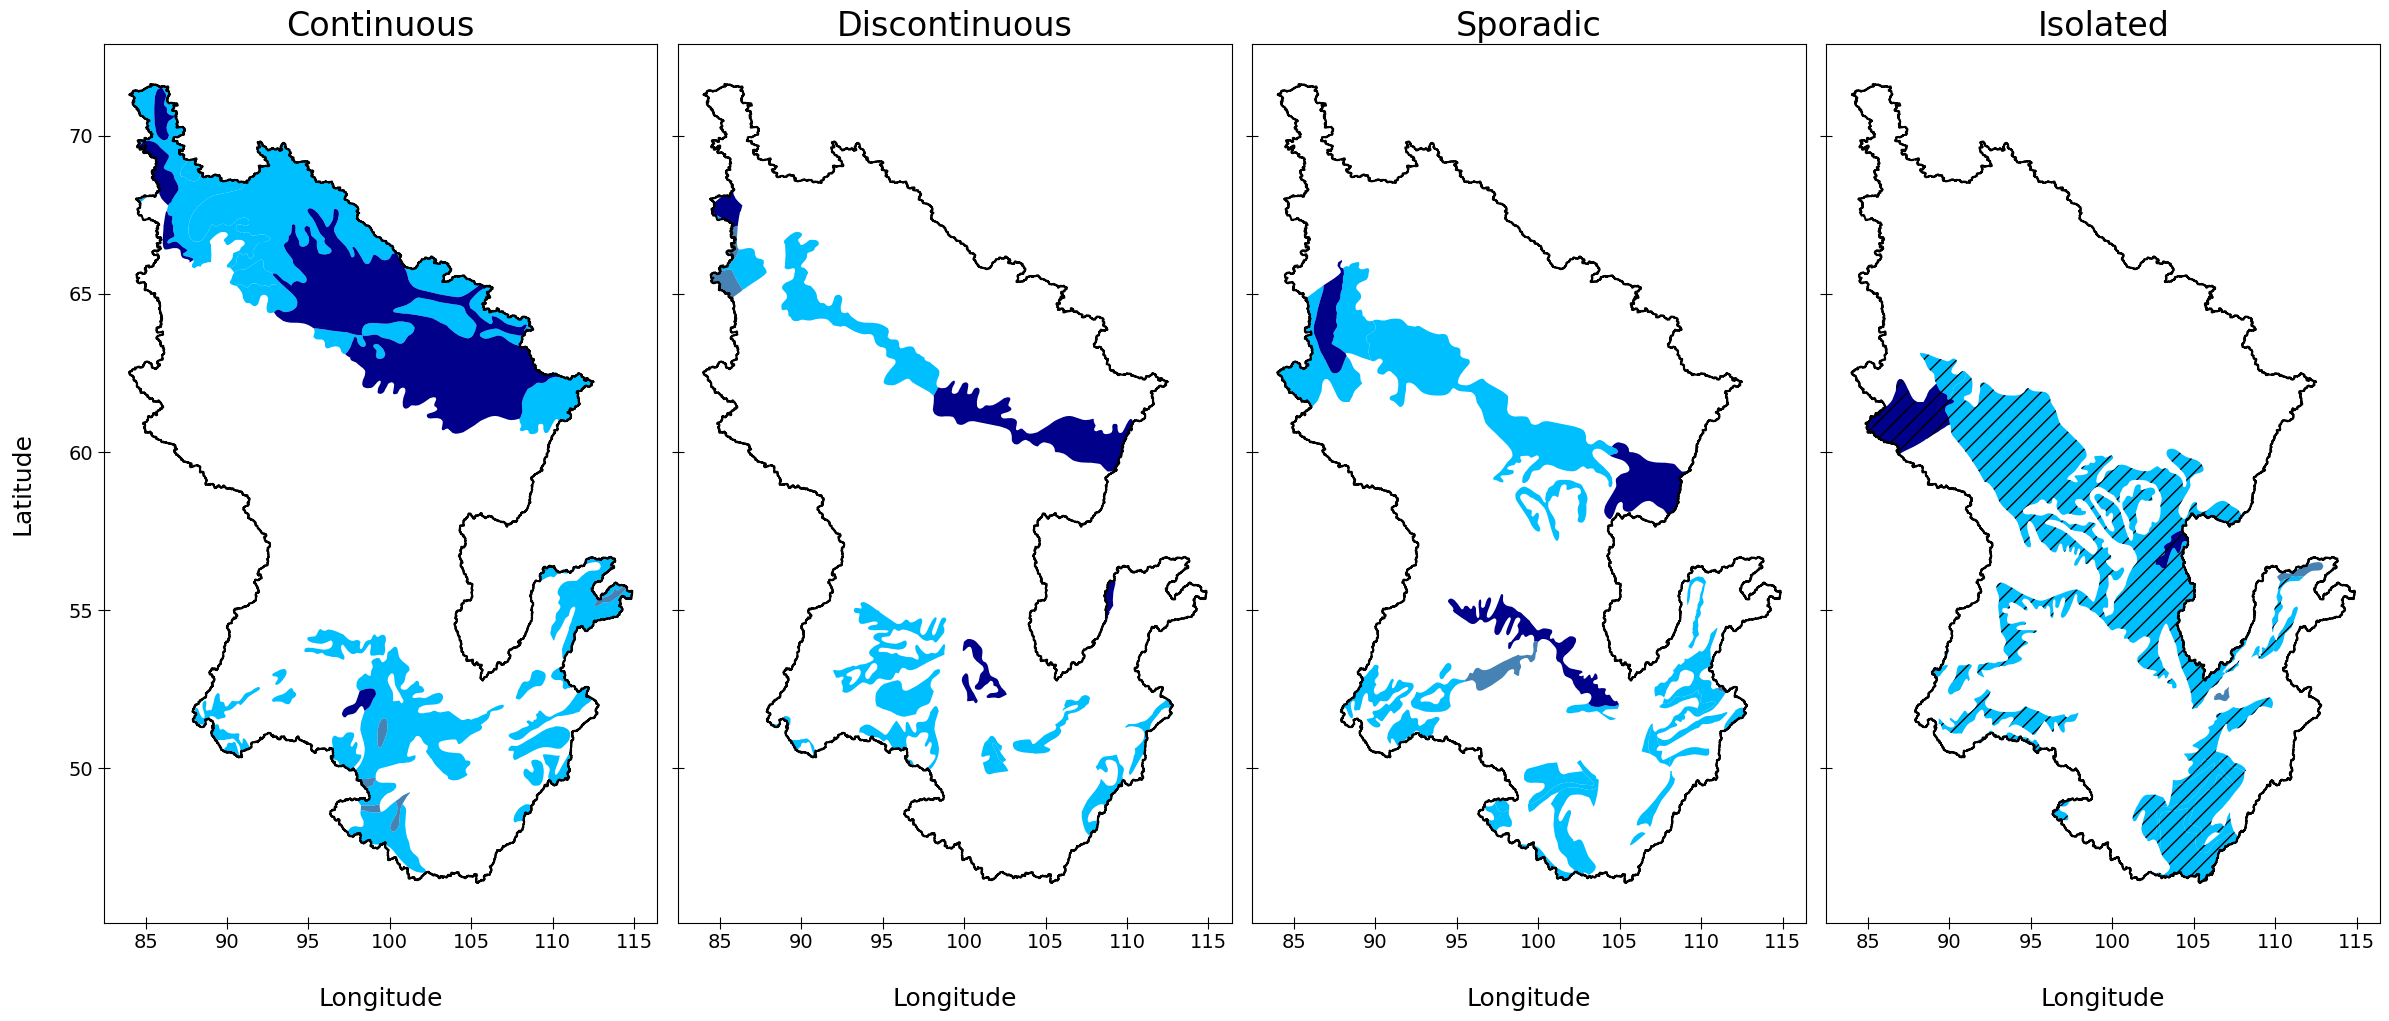

In [19]:
# Function to get color based on Ground Ice Content
def get_color(combo):
    if 'h' in combo[1]:
        return 'darkblue' #253494
    elif 'm' in combo[1]:
        return 'steelblue' #2c7fb8
    elif 'l' in combo[1]:
        return 'deepskyblue' #41b6c4
    else:
        return 'white'
    
# Function to get hatch pattern based on Overburden
def get_hatch(combo):
    return '//' if 'r' in combo[2] else None

# Assigning color and hatch pattern to each DataFrame based on the 'COMBO' column
for df in [Continuous_4326, Discontinuous_4326, Sporadic_4326, Isolated_4326]:
    df['color'] = df['COMBO'].apply(get_color)
    df['hatch'] = df['COMBO'].apply(get_hatch)

# Plotting the GeoDataFrames as subplots
fig, ax = plt.subplots(1, 4, figsize=(24, 18), sharey=True, sharex=True)

gdfs = [Continuous_4326, Discontinuous_4326, Sporadic_4326, Isolated_4326]
titles = ["Continuous", "Discontinuous", "Sporadic", "Isolated"]

ax[0].set_ylabel('Latitude', color='black', fontsize=18, labelpad=25)

for ax, gdf, title in zip(ax, gdfs, titles):
    for color in gdf['color'].unique():
        subset = gdf[gdf['color'] == color]
        hatch_pattern = subset['hatch'].iloc[0]
        subset.plot(color=color, hatch=hatch_pattern, ax=ax, legend=False)
    AGRO_Watershed.plot(ax=ax, color='none', edgecolor='black', lw=1.5, zorder=6)
    ax.set_title(title, fontsize=24)
    ax.set_xlabel('Longitude', color='black', fontsize=18, labelpad=25)
    ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=14)
    ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=14)

fig.tight_layout()

#fig.savefig('xxx.png', dpi = 600, bbox_inches='tight')

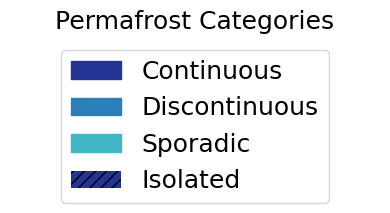

In [20]:
gdfs = [Continuous_4326, Discontinuous_4326, Sporadic_4326, Isolated_4326]
labels = ['Continuous', 'Discontinuous', 'Sporadic', 'Isolated']
titles = ["High Ground Ice", "Medium Ground Ice", "Low Ground Ice", "Exposed Bedrock"]

# Define the colors for each category in the order you want them to appear in the legend
category_colors = [
    '#253494',  # Dark blue for High Ground Ice
    '#2c7fb8',  # Medium blue for Medium Ground Ice
    '#41b6c4',  # Light blue for Low Ground Ice
]

# Add a hatching pattern for the categories with Thin Overburden/Exposed Bedrock
category_hatches = [
    None,       # No hatch for Thick Overburden
    None,       # No hatch for Thick Overburden
    None,       # No hatch for Thick Overburden
    '///',      # Hatch for Thin Overburden/Exposed Bedrock
]

#     '///'       # Hatch for Thin Overburden/Exposed Bedrock

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(category_colors, labels[:3])]

# Adding rectangle patches for hatched legend entries
for color, hatch, label in zip(category_colors, category_hatches[3:], labels[3:]):
    patches.append(Rectangle((0, 0), 1, 1, facecolor=color, hatch=hatch, label=label))

# Create the figure for the legend
fig, ax = plt.subplots(figsize=(4, 2))
ax.legend(handles=patches, loc='upper center', fontsize=18)
ax.axis('off')  # Turn off the axis
plt.title("Permafrost Categories", fontsize=18)
plt.tight_layout()
plt.show()

#fig.savefig('xxx.png', dpi = 600, bbox_inches='tight')

<br><br>

### Plot Permafrost Extent

<br><br>

(46.37338787934154, 71.62704695372541)

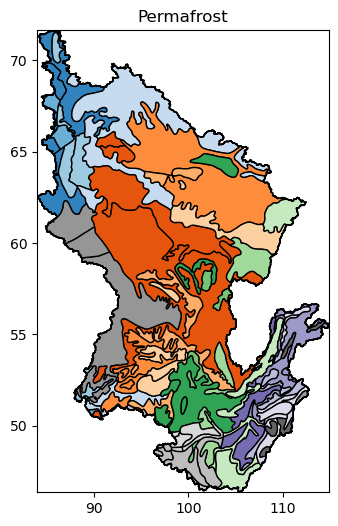

In [21]:
# Quick Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Permafrost', fontsize=12)
AGRO_Watershed.plot(ax=ax, color='none', edgecolor='black', lw=1, zorder=2)
clipped_permafrost_4326.plot(ax=ax, cmap='tab20c', edgecolor='black', lw=1)
# Setting the plot limits to the extent of the eco data
xmin, ymin, xmax, ymax = AGRO_Watershed.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

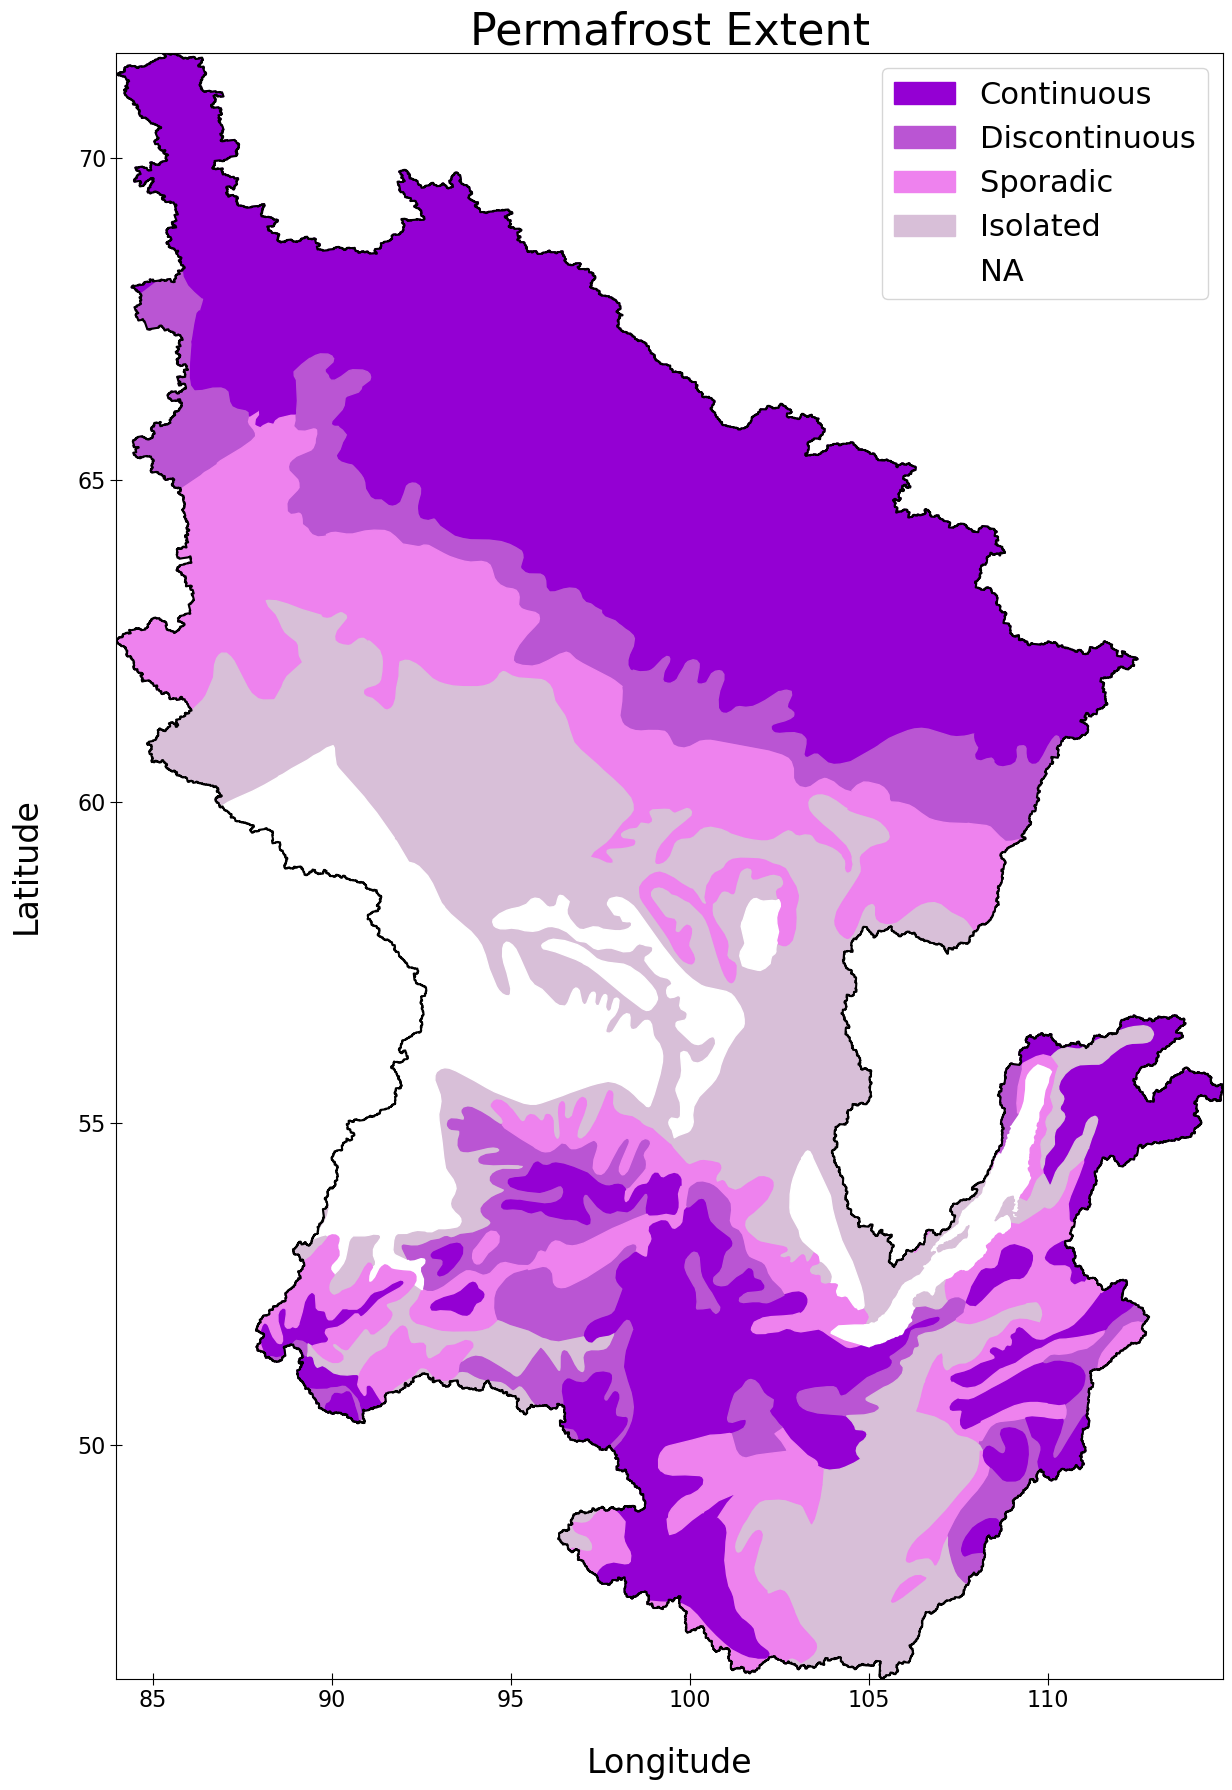

In [22]:
# Function to get color based on Ground Ice Content
def get_color(combo):
    if combo is None:
        return 'white'
    if 'C' in combo[0]:
        return 'darkviolet'
    elif 'D' in combo[0]:
        return 'mediumorchid'
    elif 'S' in combo[0]:
        return 'violet'
    elif 'I' in combo[0]:
        return 'thistle'
    else:
        return 'white'


# Assigning color and hatch pattern to each DataFrame based on the 'COMBO' column
clipped_permafrost_4326['color'] = clipped_permafrost_4326['EXTENT'].apply(get_color)

# Define the colors and labels for each category
colors = ['darkviolet', 'mediumorchid', 'violet', 'thistle', 'White']
labels = ['Continuous', 'Discontinuous', 'Sporadic', 'Isolated', 'NA']    

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Plotting the GeoDataFrames as subplots
fig, ax = plt.subplots(figsize=(18, 18))
ax.set_title('Permafrost Extent', fontsize=32)
ax.set_xlabel('Longitude', color='black', fontsize=24, labelpad=25)
ax.set_ylabel('Latitude', color='black', fontsize=24, labelpad=25)
AGRO_Watershed.plot(ax=ax, color='none', edgecolor='black', lw=1.5, zorder=6)
# Plotting clipped_permafrost_4326 with assigned colors
clipped_permafrost_4326.plot(ax=ax, zorder=5, color=clipped_permafrost_4326['color'], 
                             edgecolor= clipped_permafrost_4326['color'])

ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16)
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16)

# Plotting subsets based on unique color values
for color in clipped_permafrost_4326['color'].unique():
    subset = clipped_permafrost_4326[clipped_permafrost_4326['color'] == color]
    subset.plot(color=color, ax=ax, edgecolor=color, legend=True) # hatch=hatch_pattern, edgecolor='black'
    
# Add legend to the plot
ax.legend(handles=patches, loc='upper right', fontsize=22)

# Setting the plot limits to the extent of the eco data
xmin, ymin, xmax, ymax = AGRO_Watershed.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

fig.tight_layout()

#fig.savefig('xxx.png', dpi = 600, bbox_inches='tight')

In [23]:
# Additional Land Type
land = clipped_permafrost_4326[clipped_permafrost_4326['COMBO'] == 'ld']
lakey = clipped_permafrost_4326[clipped_permafrost_4326['COMBO'] == 'l'] 
oceans = clipped_permafrost_4326[clipped_permafrost_4326['COMBO'] == 'o'] # None
relic = clipped_permafrost_4326[clipped_permafrost_4326['COMBO'] == 'r'] # 

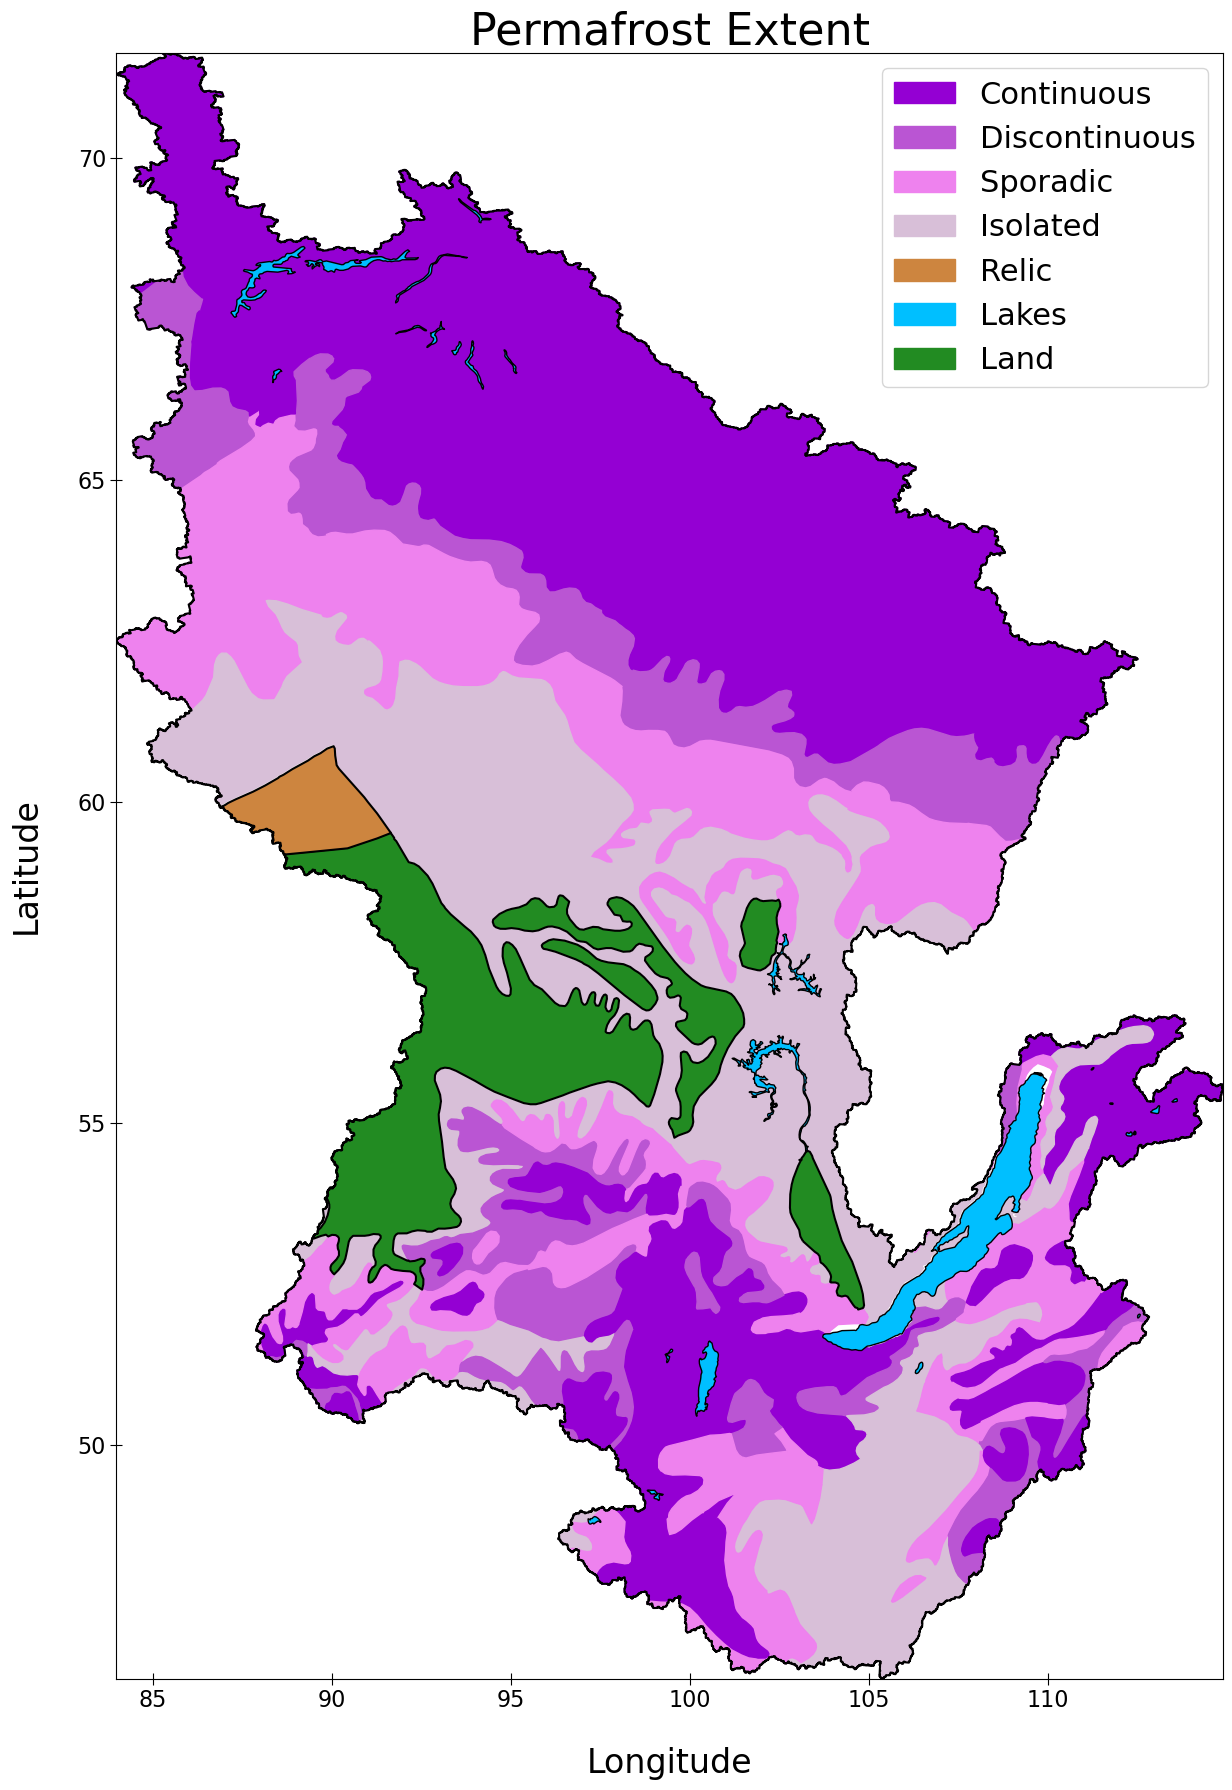

In [24]:
# Function to get color based on Ground Ice Content
def get_color(combo):
    if combo is None:
        return 'white'
    if 'C' in combo[0]:
        return 'darkviolet'
    elif 'D' in combo[0]:
        return 'mediumorchid'
    elif 'S' in combo[0]:
        return 'violet'
    elif 'I' in combo[0]:
        return 'thistle'
    else:
        return 'white'


# Function to get hatch pattern based on Overburden
def get_hatch(combo):
    if len(combo) > 2 and 'r' in combo[2]:
        return '//'
    else:
        return None

# Assigning color and hatch pattern to each DataFrame based on the 'COMBO' column
clipped_permafrost_4326['color'] = clipped_permafrost_4326['EXTENT'].apply(get_color)
#clipped_permafrost_4326['hatch'] = clipped_permafrost_4326['COMBO'].apply(get_hatch)

# Define the colors and labels for each category
colors = ['darkviolet', 'mediumorchid', 'violet', 'thistle', 'peru','deepskyblue','forestgreen']
labels = ['Continuous', 'Discontinuous', 'Sporadic', 'Isolated', 'Relic','Lakes','Land']

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Plotting the GeoDataFrames as subplots
fig, ax = plt.subplots(figsize=(18, 18))
ax.set_title('Permafrost Extent', fontsize=32)
ax.set_xlabel('Longitude', color='black', fontsize=24, labelpad=25)
ax.set_ylabel('Latitude', color='black', fontsize=24, labelpad=25)
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16)
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16)

# Plotting clipped_permafrost_4326 with assigned colors
clipped_permafrost_4326.plot(ax=ax, zorder=5, color=clipped_permafrost_4326['color'], edgecolor= clipped_permafrost_4326['color'])
AGRO_Watershed.plot(ax=ax, color='none', edgecolor='black', lw=1.5, zorder=6)
gpd_lakes.plot(ax=ax, edgecolor='black', color='deepskyblue', lw=1, zorder=6)
land.plot(ax=ax, color='forestgreen', edgecolor='black', lw=1.5, zorder=6)
relic.plot(ax=ax, color='peru', edgecolor='black', lw=1.5, zorder=6)

# Plotting subsets based on unique color values
for color in clipped_permafrost_4326['color'].unique():
    subset = clipped_permafrost_4326[clipped_permafrost_4326['color'] == color]
    subset.plot(color=color, ax=ax, edgecolor=color, legend=True) # hatch=hatch_pattern, edgecolor='black'
    
# Add legend to the plot
ax.legend(handles=patches, loc='upper right', fontsize=22)

# Setting the plot limits to the extent of the eco data
xmin, ymin, xmax, ymax = AGRO_Watershed.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

fig.tight_layout()


#fig.savefig('xxx.png', dpi = 600, bbox_inches='tight')